In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [2]:
salary = pd.read_csv("https://richardson.byu.edu/220/ds_salary.csv")
salary.head(10)

,...1,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
8,9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S
9,10,2020,EN,FT,Data Scientist,45000,EUR,51321,FR,0,FR,S


In [4]:
salary.shape

(581, 12)

**1. Salary Data**<br>
plotting and describing the general shape of the salary data. This initial
step sets the foundation for your analysis.

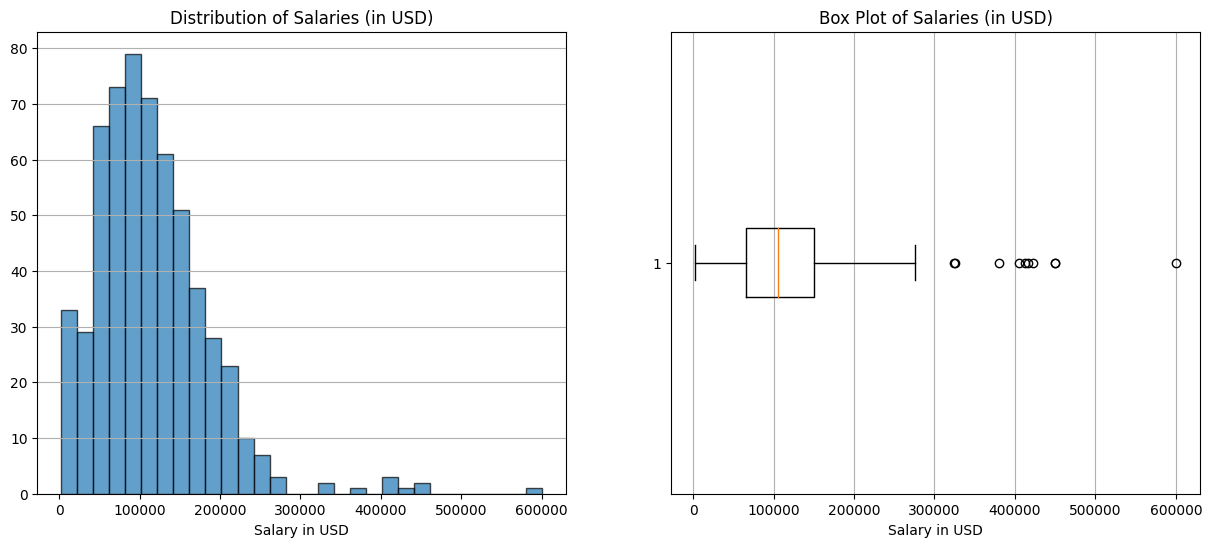

count       581.000000
mean     115601.769363
std       70607.253360
min        2859.000000
25%       66022.000000
50%      105000.000000
75%      150260.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

In [5]:
# Plotting a histogram for the 'salary_in_usd' column
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.hist(salary['salary_in_usd'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Salaries (in USD)')
plt.xlabel('Salary in USD')
plt.grid(axis='y')

plt.subplot(1, 2, 2)
plt.boxplot(salary['salary_in_usd'], vert=False)
plt.title('Box Plot of Salaries (in USD)')
plt.xlabel('Salary in USD')
plt.grid(axis='x')
plt.show()

# Generating descriptive statistics for the 'salary_in_usd' column
salary_descriptive_stats = salary['salary_in_usd'].describe()
salary_descriptive_stats


**2. Effect of Experience on Salary**<br>
Investigate how experience influences data scientist salaries. Create visualizations or tables to illustrate any trends or patterns<br><br>
**Experience Levels:**<br>
EN: Entry-level / Junior<br>
MI: Mid-level / Intermediate<br>
SE: Senior-level / Expert<br>
EX: Executive-level / Director<br>

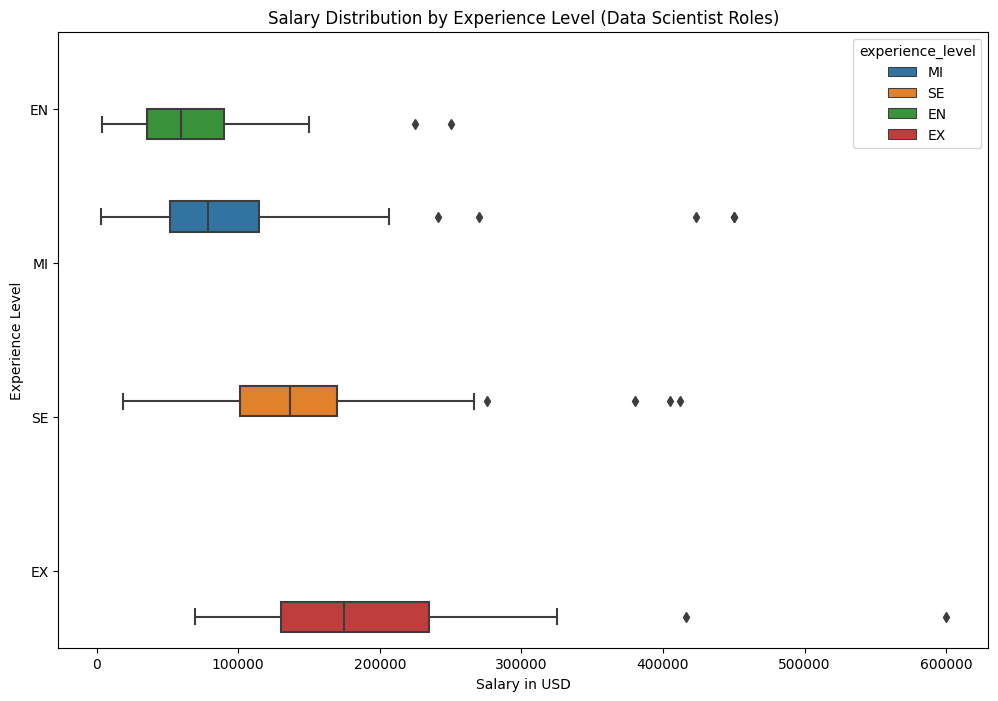

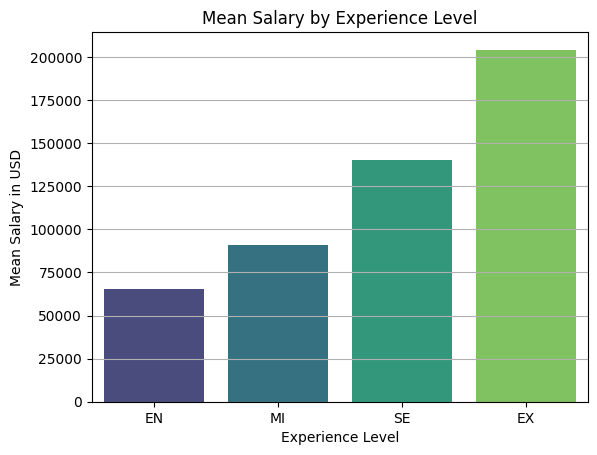

In [6]:
experience_level_order = ['EN', 'MI', 'SE', 'EX']
plt.figure(figsize=(12, 8))
sns.boxplot(x='salary_in_usd', y='experience_level', hue="experience_level", data=salary, order=experience_level_order)
plt.title('Salary Distribution by Experience Level (Data Scientist Roles)')
plt.xlabel('Salary in USD')
plt.ylabel('Experience Level')
plt.show()

mean_salary_by_exp= salary.groupby('experience_level')['salary_in_usd'].mean().reset_index()

sns.barplot(x='experience_level', y='salary_in_usd', data=mean_salary_by_exp, palette='viridis', order=['EN', 'MI', 'SE', 'EX'])
plt.title('Mean Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Mean Salary in USD')
plt.grid(axis='y')
plt.show()



**3. Impact of Company Size on Salary:**<br>
• Explore how company size affects data scientist salaries. Generate plots or tables to
visualize this relationship.

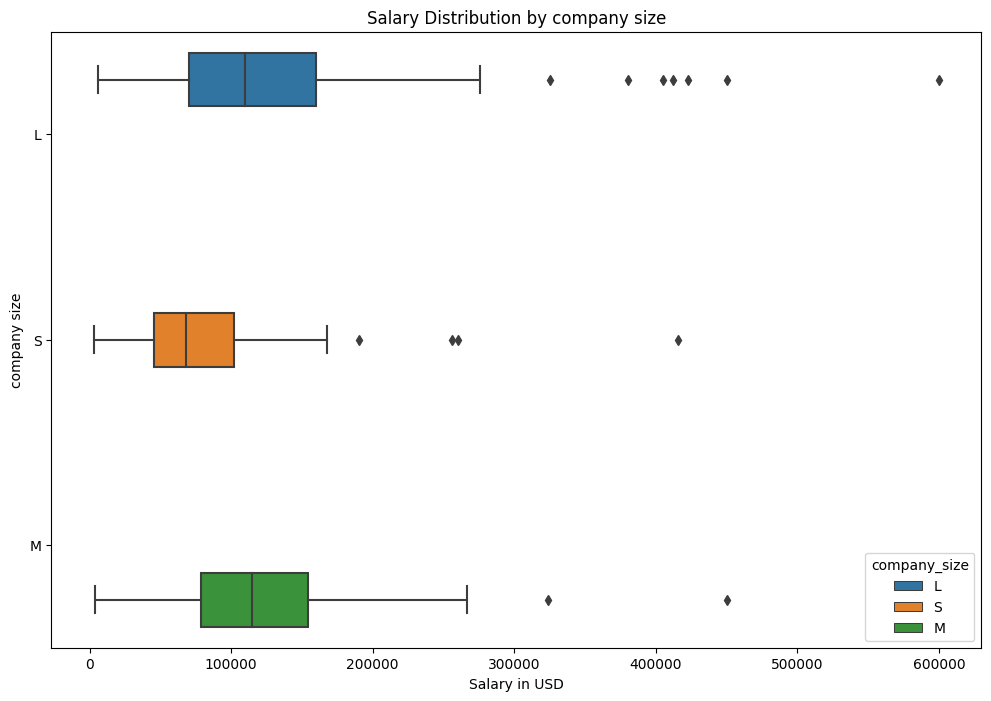

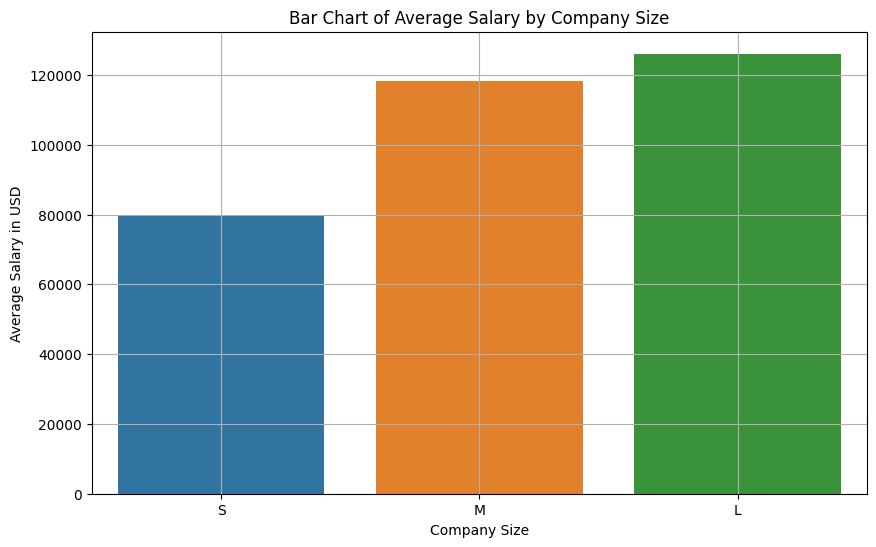

In [7]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='salary_in_usd', y='company_size',hue= "company_size", data=salary)
plt.title('Salary Distribution by company size')
plt.xlabel('Salary in USD')
plt.ylabel('company size')


plt.figure(figsize=(10,6))
sns.barplot(x='company_size', y='salary_in_usd' ,data=salary, errorbar=None, order=["S", "M", "L"])
plt.title('Bar Chart of Average Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average Salary in USD')
plt.grid(True)
plt.show()


** *italicized text*4. Job Title Analysis**<br>

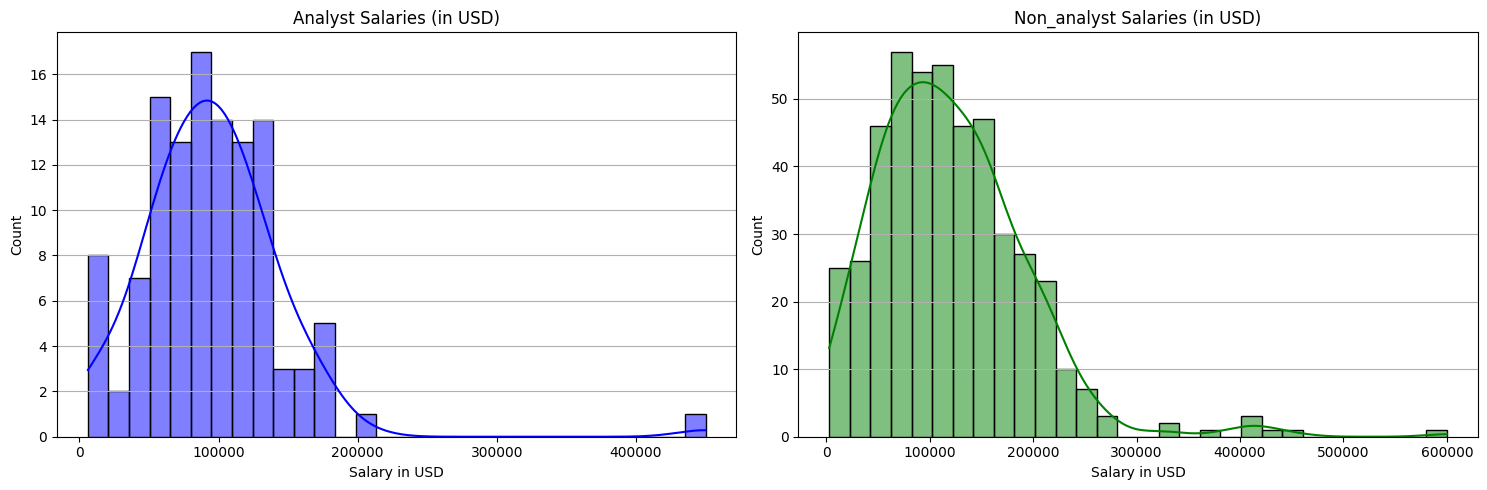

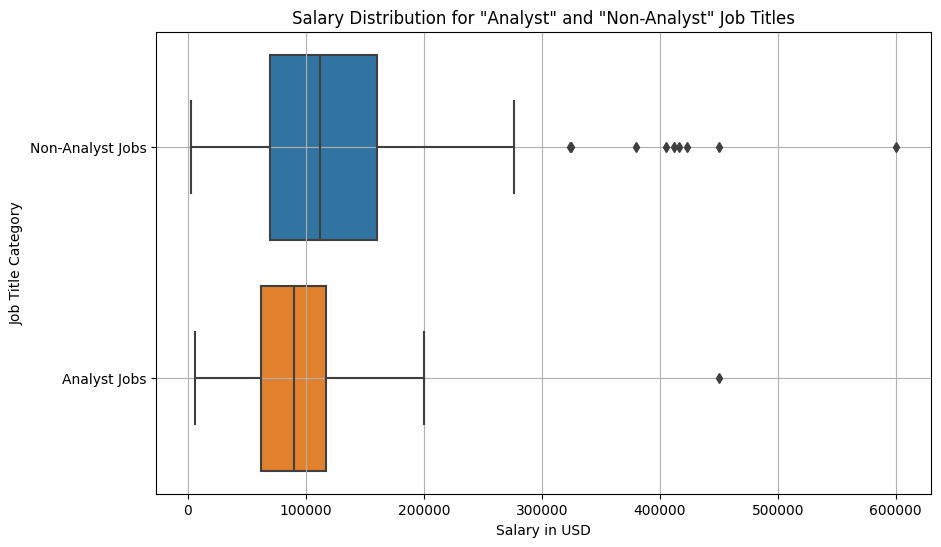

Analyst data: 
 count       116.000000
mean      94970.129310
std       52887.676675
min        6072.000000
25%       61747.000000
50%       90320.000000
75%      117262.500000
max      450000.000000
Name: salary_in_usd, dtype: float64
Non analyst data: 
 count       465.000000
mean     120748.587097
std       73522.234587
min        2859.000000
25%       69741.000000
50%      112000.000000
75%      160000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64


In [8]:
analyst_salary = salary[salary['job_title'].str.contains('Analyst', case=False, na=False)]
non_analyst_salary = salary[~salary['job_title'].str.contains('analyst', case=False, na=False)]
# histograms comparison for analyst and non-analyst salaries
# analyst
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.histplot(analyst_salary['salary_in_usd'], bins=30, color="blue", kde=True)
plt.title('Analyst Salaries (in USD)')
plt.xlabel('Salary in USD')
plt.grid(axis='y')

# non analyst
plt.subplot(1, 2, 2)
sns.histplot(non_analyst_salary['salary_in_usd'], bins=30, color="green", kde=True)
plt.title('Non_analyst Salaries (in USD)')
plt.xlabel('Salary in USD')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

# box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='salary_in_usd', y=salary['job_title'].str.contains('analyst', case=False, na=False).astype('str'), data=salary)
plt.yticks(ticks=[0, 1], labels=['Non-Analyst Jobs', 'Analyst Jobs'])
plt.title('Salary Distribution for "Analyst" and "Non-Analyst" Job Titles')
plt.xlabel('Salary in USD')
plt.ylabel('Job Title Category')
plt.grid(True)
plt.show()

# Generating descriptive statistics for the 'salary_in_usd' column
analyst_salary_descriptive_stats = analyst_salary['salary_in_usd'].describe()
print("Analyst data: \n",analyst_salary_descriptive_stats)
non_analyst_salary_descriptive_stats = non_analyst_salary['salary_in_usd'].describe()
print("Non analyst data: \n",non_analyst_salary_descriptive_stats)

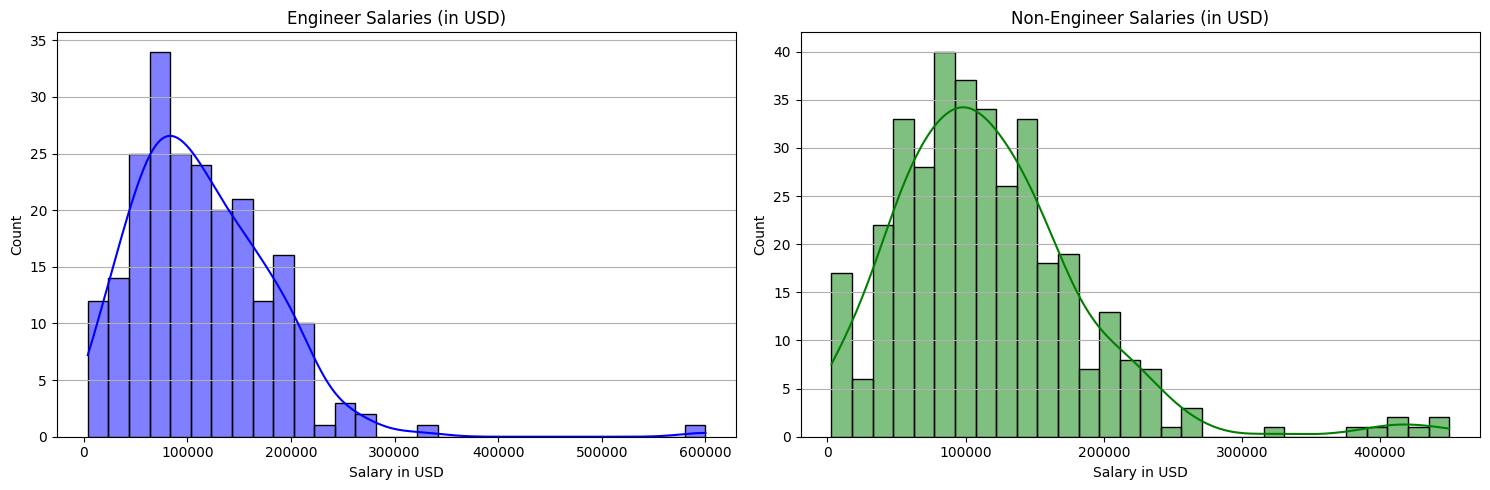

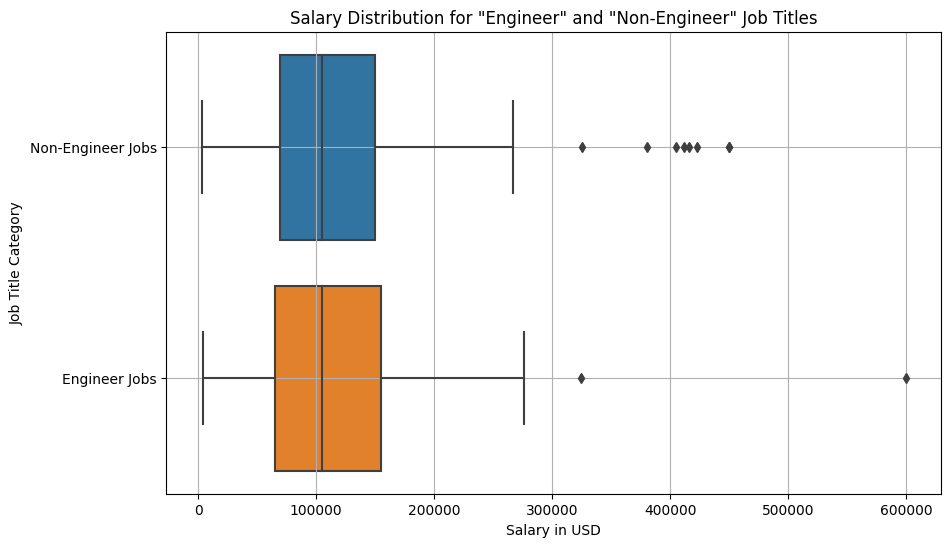

Engineer data: 
 count       221.000000
mean     113737.791855
std       69397.077179
min        4000.000000
25%       65438.000000
50%      104702.000000
75%      155000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

Non-Engineer data: 
 count       360.000000
mean     116746.044444
std       71411.820773
min        2859.000000
25%       69252.000000
50%      105200.000000
75%      150000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64


In [9]:
engineer_salary = salary[salary['job_title'].str.contains('Engineer', case=False, na=False)]
non_engineer_salary = salary[~salary['job_title'].str.contains('Engineer', case=False, na=False)]
# histograms comparison for analyst and non-analyst salaries
# analyst
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.histplot(engineer_salary['salary_in_usd'], bins=30, color="blue", kde=True)
plt.title('Engineer Salaries (in USD)')
plt.xlabel('Salary in USD')
plt.grid(axis='y')

# non analyst
plt.subplot(1, 2, 2)
sns.histplot(non_engineer_salary['salary_in_usd'], bins=30, color="green", kde=True)
plt.title('Non-Engineer Salaries (in USD)')
plt.xlabel('Salary in USD')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

# box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='salary_in_usd', y=salary['job_title'].str.contains('engineer', case=False, na=False).astype('str'), data=salary)
plt.yticks(ticks=[0, 1], labels=['Non-Engineer Jobs', 'Engineer Jobs'])
plt.title('Salary Distribution for "Engineer" and "Non-Engineer" Job Titles')
plt.xlabel('Salary in USD')
plt.ylabel('Job Title Category')
plt.grid(True)
plt.show()

# Generating descriptive statistics for the 'salary_in_usd' column
analyst_salary_descriptive_stats = engineer_salary['salary_in_usd'].describe()
print("Engineer data: \n",analyst_salary_descriptive_stats, end='\n\n')
non_analyst_salary_descriptive_stats = non_engineer_salary['salary_in_usd'].describe()
print("Non-Engineer data: \n",non_analyst_salary_descriptive_stats)

**4. Interactions Between Relationships:**<br>

In [10]:
pd.crosstab(salary["job_title"], salary["company_size"], aggfunc="mean", values=salary["salary_in_usd"]).round(0)

company_size,L,M,S
job_title,,,
3D Computer Vision Researcher,NaN,5409.0,NaN
AI Scientist,127500.0,66000.0,28948.0
Analytics Engineer,NaN,175000.0,NaN
Applied Data Scientist,175655.0,NaN,NaN
Applied Machine Learning Scientist,249000.0,35138.0,NaN
BI Data Analyst,150000.0,99000.0,32136.0
Big Data Architect,NaN,99703.0,NaN
Big Data Engineer,37941.0,84512.0,66024.0
Business Data Analyst,91254.0,NaN,NaN


In [11]:
pd.crosstab(salary["job_title"], salary["experience_level"], aggfunc="mean", values=salary["salary_in_usd"]).round(0)

experience_level,EN,EX,MI,SE
job_title,,,,
3D Computer Vision Researcher,NaN,NaN,5409.0,NaN
AI Scientist,23299.0,NaN,160000.0,55000.0
Analytics Engineer,NaN,155000.0,NaN,195000.0
Applied Data Scientist,110037.0,NaN,105619.0,278500.0
Applied Machine Learning Scientist,31875.0,NaN,178800.0,NaN
BI Data Analyst,32136.0,150000.0,99000.0,NaN
Big Data Architect,NaN,NaN,NaN,99703.0
Big Data Engineer,37941.0,NaN,39000.0,111536.0
Business Data Analyst,79551.0,NaN,102956.0,NaN


In [12]:
pd.crosstab(salary["experience_level"], salary["company_size"], aggfunc="mean", values=salary["salary_in_usd"]).round(0)

company_size,L,M,S
experience_level,,,
EN,78276.0,53377.0,64579.0
EX,236232.0,178242.0,201309.0
MI,103851.0,91424.0,50986.0
SE,154427.0,137816.0,116027.0


**6. Conclusions** <br>

1. General Salary Data:<br>
First thing we noticed is that the data was right skewed, which matches the fact that the mean is bigger than the median. The boxplot shows many outliers which is also casues the graph to be right skewed. In real life context, the results makes sense, since it is common in income data to see small number of people earning significantly higher salaries. The mean salary was 100000$ with 75% of people making less than around 150000$.<br><br>
2. Effect of experience on Salary:<br>
It is easy to notice from the bar graph that salary increases with expereince and the jump in salary is the highest between a senior and an executive. The existence of outliers in the boxplot shows that there are some individuals that earn significantly higher salaries than the average. For example, there are some entry level individuals that earn higher than the average executive.<br><br>
3. Impact of Company Size on Salary<br>
It is noticeable that salaries get higher with the size of the company. The jump in salaries between small and medium companies is higher than the jump between medium and large companies. We are suggesting that small companies refer to mostly startups, since they usually make less money than established companies. <br><br>
4. Job Title Analysis <br>
We ran job title analysis on 'analyst' and 'engineer' titles seperately and we found the following:
- Data scientists with analyst job titles make less on average than non-analyst job titles, and the graphs show less outliers for analyst. This makes sense in real world since analysts are mainly entry-level jobs.
- The average salary for a data scientist with an engineer job title is higher than the average salary for one with an analyst job title.
- We observed that there are more data scientist with an engineer job title than analysts.
- We noticed that the average is similar between data scientist with or without engineer job title. In general, the boxplots were similar. This could mean that just having an engineer job title does not mean that data scientists would make a higher income.
5. InteractionsBetweenRelationships: <br>
The table comparing experience level and job title was the most striking. It is almost a trend for data scientist of any job title to make more money in bigger companies. This assumption is not the most accurate among executives but that it is probably because the role of executive differs among companies.


